# Different types of norm

In [1]:
def normalize_01(img1, img2):
    """
    Normalizza entrambe le immagini tra 0 e 1 in base all'immagine con il massimo valore (più rumorosa), media indefinita.
    """
    # Verifica che le patch non siano vuote prima della normalizzazione
    if img1.size > 0 and img2.size > 0:
        min_val = min(img1.min(), img2.min())
        max_val = max(img1.max(), img2.max())
    # Normalizzazione tra 0 e 1, commentare in caso
    if max_val != min_val:  # Evita divisione per zero
        img1_normalized = (img1 - min_val) / (max_val - min_val)
        img2_normalized = (img2 - min_val) / (max_val - min_val)
    return img1_normalized, img2_normalized

def normalize(img1, img2):
    """
    Normalizza entrambe le immagini tra 0 e 1 in base all'immagine con il massimo valore (più rumorosa), media indefinita.
    """
    # Verifica che le patch non siano vuote prima della normalizzazione
    if img1.size > 0 and img2.size > 0:
        max_val = max(abs(img1).max(), abs(img2).max())
    # Normalizzazione tra 0 e 1, commentare in caso
    if max_val != 0:  # Evita divisione per zero
        img1_normalized = img1/ max_val
        img2_normalized = img2 / max_val
    return img1_normalized, img2_normalized

In [2]:
def antinormalize_01(img1_o, img2_o, img1_n, img2_n):
    """
    Riporta le immagini ad antinormalizzate, prende in input le originali _o e le normalizzate_n
    """
    # Verifica che le patch non siano vuote prima della normalizzazione
    if img1_o.size > 0 and img2_o.size > 0:
        min_val = min(img1_o.min(), img2_o.min())
        max_val = max(img1_o.max(), img2_o.max())
    # Normalizzazione tra 0 e 1, commentare in caso
    if max_val != min_val:  # Evita divisione per zero
        img1_restored = (img1_n) * (max_val - min_val) + min_val
        img2_restored = (img2_n) * (max_val - min_val) + min_val
    return img1_restored, img2_restored

# vedi dataset

dict_keys(['__header__', '__version__', '__globals__', 'label'])
Available keys in the ground truth .mat file: ['label']
Displaying ground truth variable 'label' with shape (300, 900)
dict_keys(['__header__', '__version__', '__globals__', 'noisy'])
Available keys in the noisy .mat file: ['noisy']
Displaying noisy variable 'noisy' with shape (300, 900)


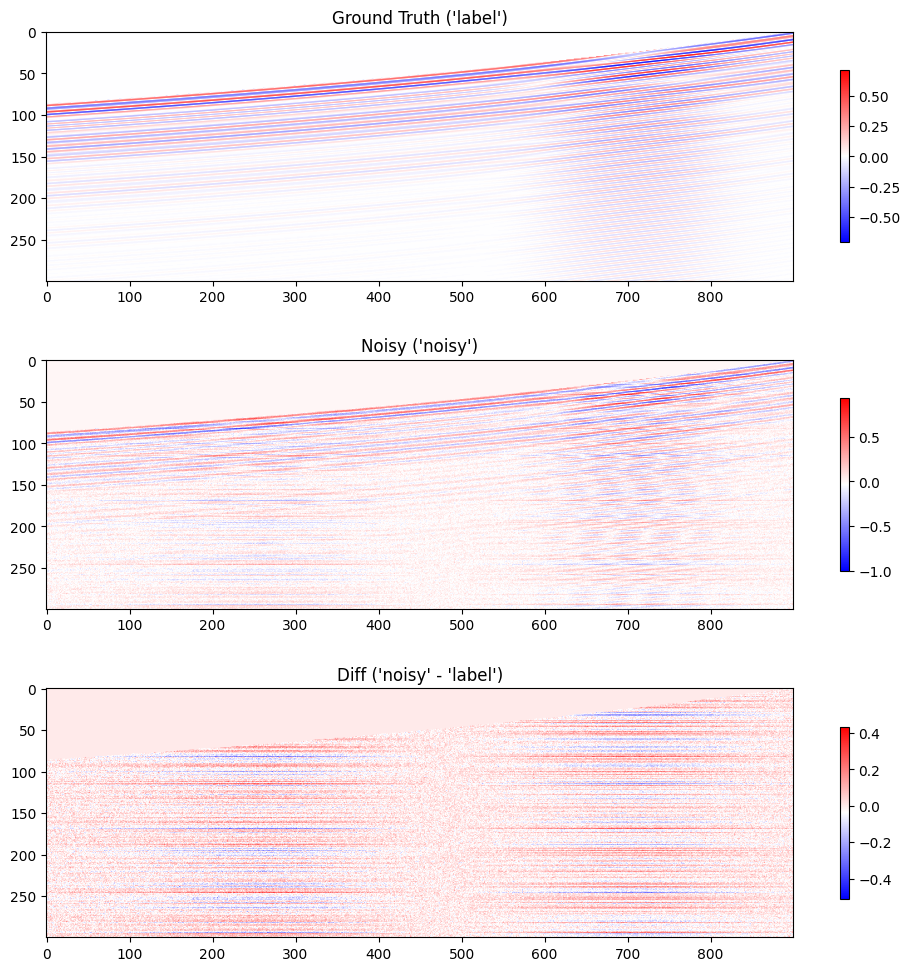

In [3]:
import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the path and name of the .mat file
path = path = 'Dataset/dt_3/train/'
name = 'S_72.mat'

# Load the ground truth .mat file
mat_file_path_gt = path + 'label/' + name
mat_data_gt = sio.loadmat(mat_file_path_gt)
print(mat_data_gt.keys())

# Display all keys in the .mat file (excluding hidden keys starting with __)
keys_gt = [key for key in mat_data_gt.keys() if not key.startswith('__')]
print("Available keys in the ground truth .mat file:", keys_gt)

# Extract the first available key for the ground truth
if len(keys_gt) > 0:
    variable_name_gt = keys_gt[0]
    data_gt = mat_data_gt[variable_name_gt]
    print(f"Displaying ground truth variable '{variable_name_gt}' with shape {data_gt.shape}")
else:
    print("No usable variables found in the ground truth .mat file.")

# Load the noisy .mat file
mat_file_path_noisy = path + 'noisy/' + name
mat_data_noisy = sio.loadmat(mat_file_path_noisy)
print(mat_data_noisy.keys())

# Display all keys in the .mat file (excluding hidden keys starting with __)
keys_noisy = [key for key in mat_data_noisy.keys() if not key.startswith('__')]
print("Available keys in the noisy .mat file:", keys_noisy)

# Extract the first available key for the noisy data
if len(keys_noisy) > 0:
    variable_name_noisy = keys_noisy[0]
    data_noisy = mat_data_noisy[variable_name_noisy]
    print(f"Displaying noisy variable '{variable_name_noisy}' with shape {data_noisy.shape}")
    
    #residual
    #data_gt = data_noisy- data_gt
    
    # Normalize images
    #data_noisy_n, data_gt_n = normalize(data_noisy, data_gt)
    data_noisy, data_gt = normalize(data_noisy, data_gt)
    
    # Antinormalize images
    #data_noisy, data_gt = antinormalize(data_noisy, data_gt, data_noisy_n, data_gt_n)
    
    # Calculate the difference between noisy and ground truth data
    data_diff = data_noisy - data_gt

    # Create a 1x3 subplot with larger figure size
    fig, axs = plt.subplots(3, 1, figsize=(10, 10))  # Increased width for larger images

    # Create a custom colormap
    colors = ["blue", "white", "red"]
    custom_cmap = LinearSegmentedColormap.from_list("custom_seismic", colors)
    
    # Display the ground truth in the first panel
    im1 = axs[0].imshow(data_gt, cmap=custom_cmap)
    axs[0].set_title(f"Ground Truth ('{variable_name_gt}')")
    cbar1 = fig.colorbar(im1, ax=axs[0], shrink=0.6)  # Shrink colorbar

    # Display the noisy data in the second panel
    im2 = axs[1].imshow(data_noisy, cmap=custom_cmap)
    axs[1].set_title(f"Noisy ('{variable_name_noisy}')")
    cbar2 = fig.colorbar(im2, ax=axs[1], shrink=0.6)  # Shrink colorbar

    # Display the difference between noisy and ground truth in the third panel
    im3 = axs[2].imshow(data_diff, cmap=custom_cmap)
    axs[2].set_title(f"Diff ('{variable_name_noisy}' - '{variable_name_gt}')")
    cbar3 = fig.colorbar(im3, ax=axs[2], shrink=0.6)  # Shrink colorbar

    # Show the plot
    plt.tight_layout()  # Adjust layout
    plt.show()
else:
    print("No usable variables found in the noisy .mat file.")



Displaying ground truth variable 'label' with shape (1600, 1300)
Displaying noisy variable 'noisy' with shape (1600, 1300)


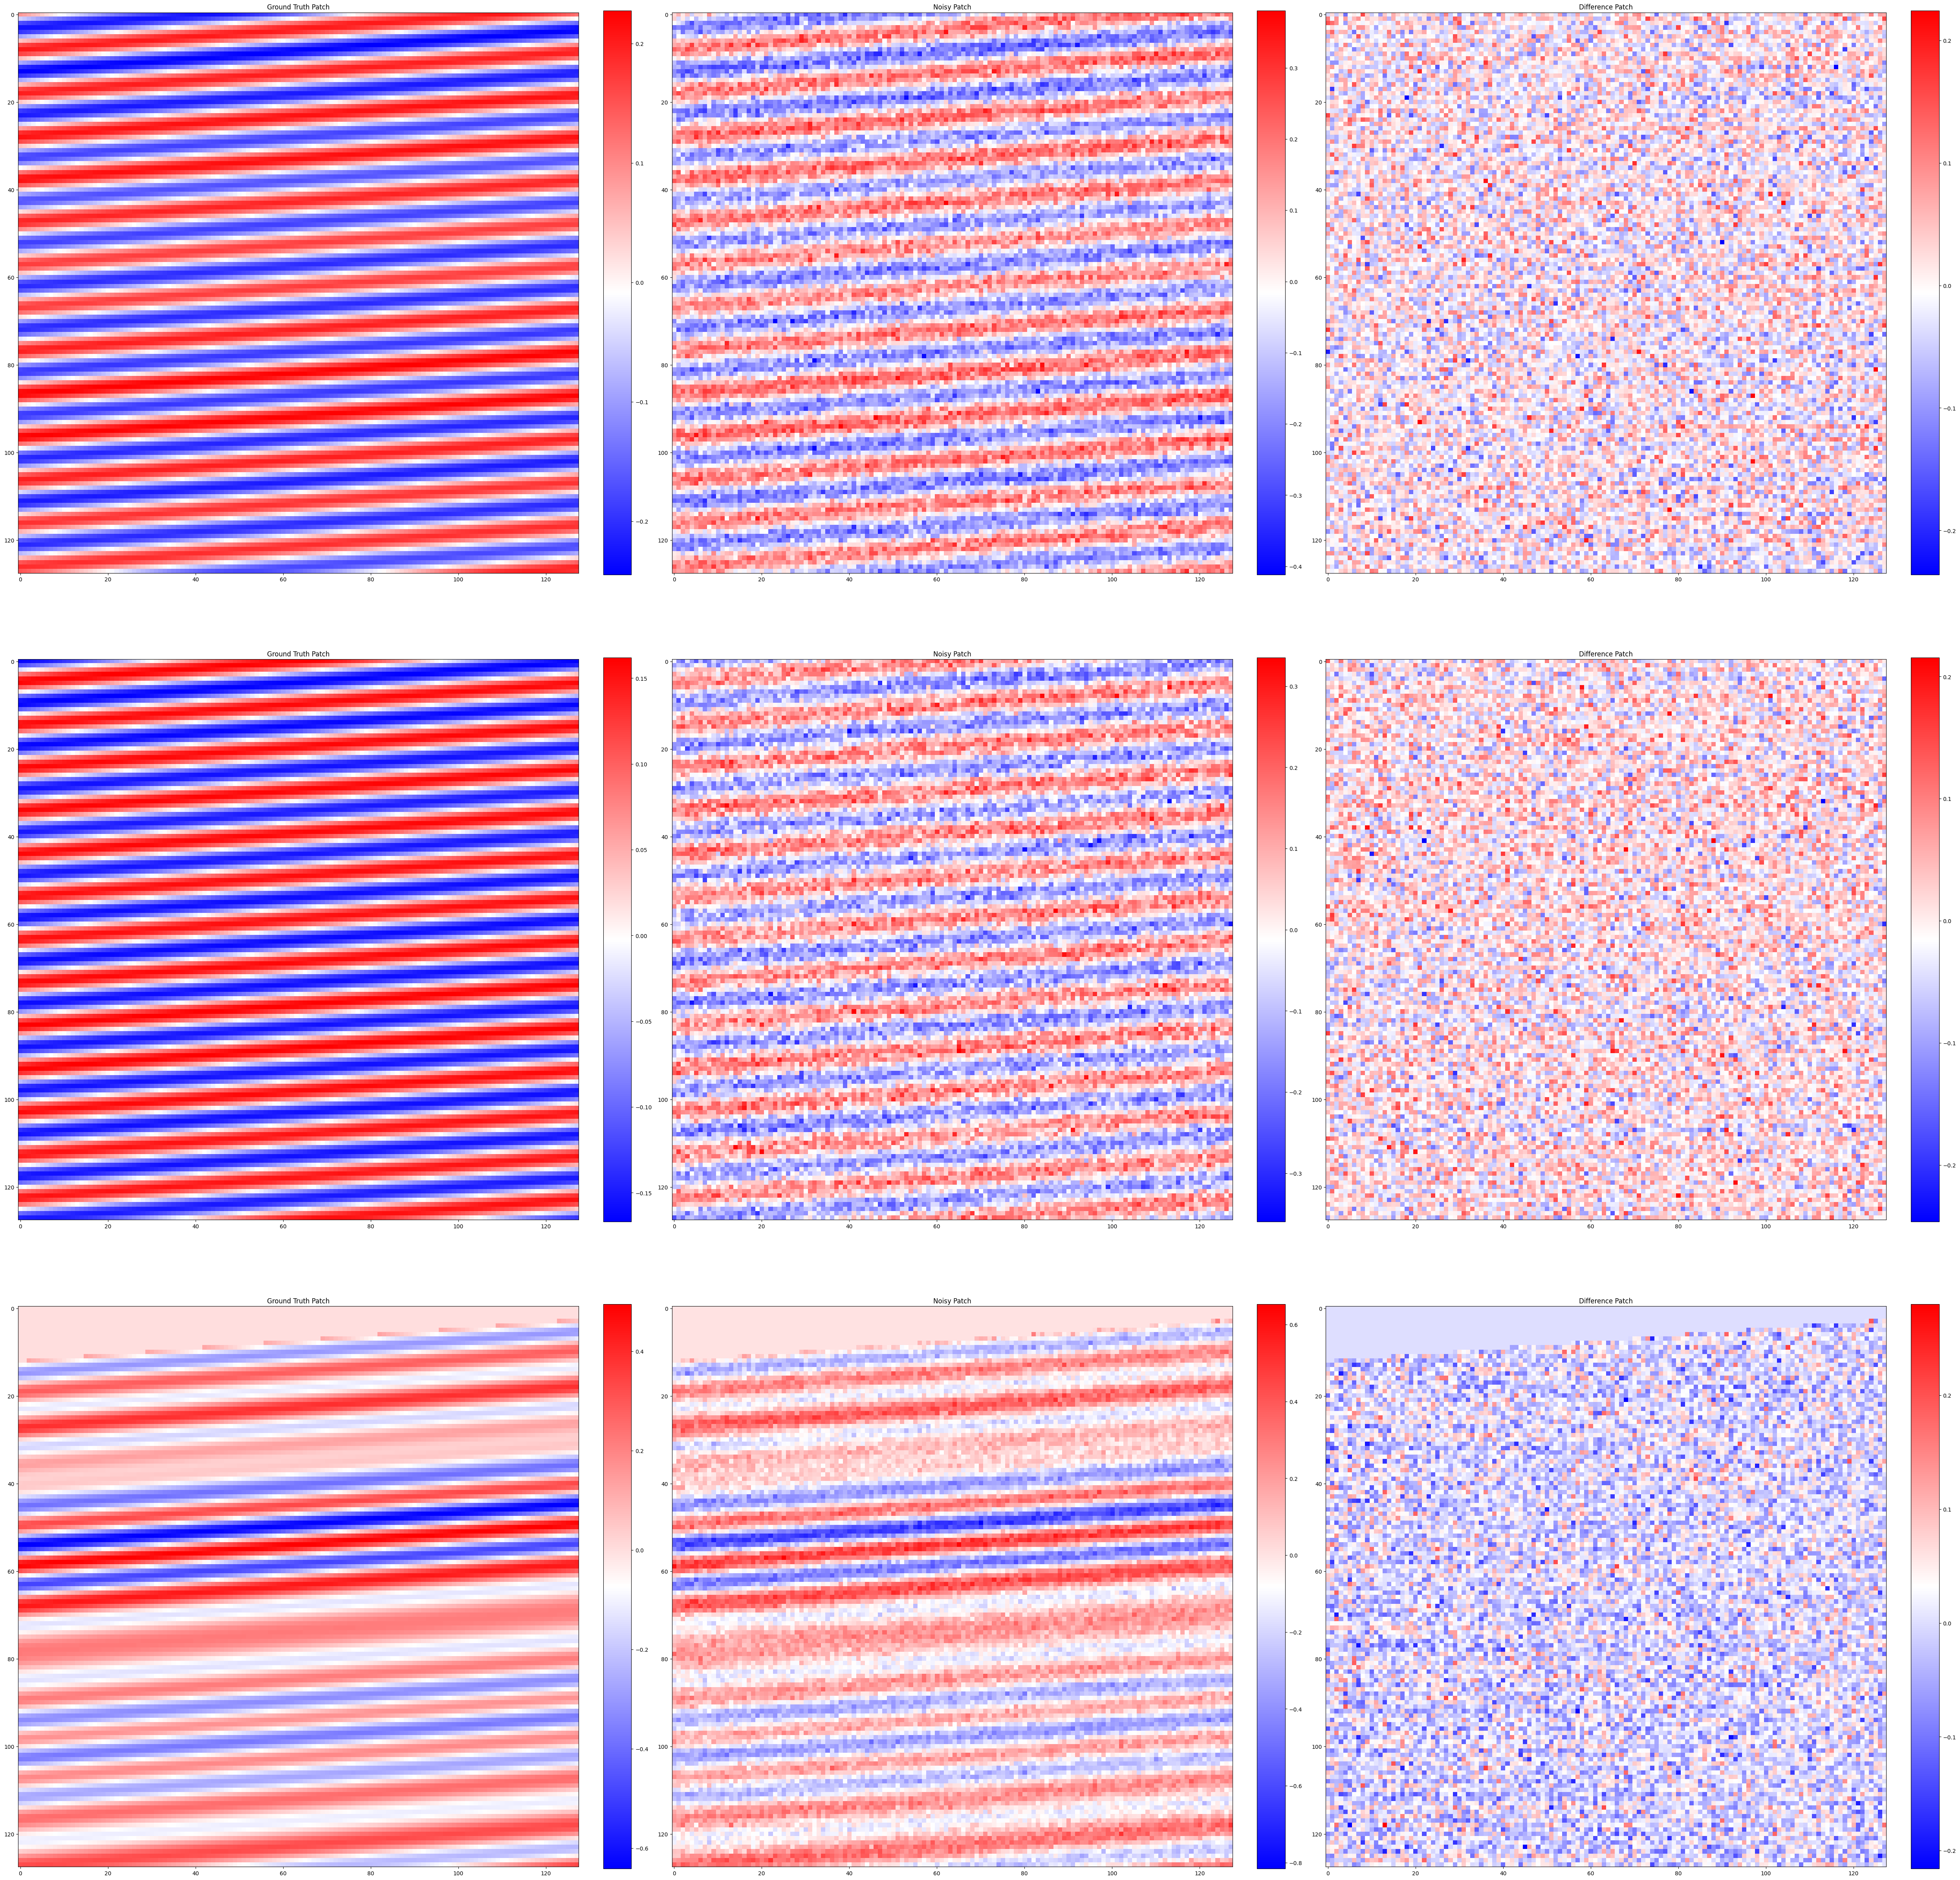

In [21]:
#view patches

import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define the path and name of the .mat file
path = 'Dataset/TA/TA2/test/perc10/'
name = 'S_2.mat'

# Load the ground truth .mat file
mat_file_path_gt = path + 'label/' + name
mat_data_gt = sio.loadmat(mat_file_path_gt)

# Display all keys in the .mat file (excluding hidden keys starting with __)
keys_gt = [key for key in mat_data_gt.keys() if not key.startswith('__')]
if len(keys_gt) > 0:
    variable_name_gt = keys_gt[0]
    data_gt = mat_data_gt[variable_name_gt]
    print(f"Displaying ground truth variable '{variable_name_gt}' with shape {data_gt.shape}")
else:
    print("No usable variables found in the ground truth .mat file.")

# Load the noisy .mat file
mat_file_path_noisy = path + 'noisy/' + name
mat_data_noisy = sio.loadmat(mat_file_path_noisy)

# Display all keys in the .mat file (excluding hidden keys starting with __)
keys_noisy = [key for key in mat_data_noisy.keys() if not key.startswith('__')]
if len(keys_noisy) > 0:
    variable_name_noisy = keys_noisy[0]
    data_noisy = mat_data_noisy[variable_name_noisy]
    print(f"Displaying noisy variable '{variable_name_noisy}' with shape {data_noisy.shape}")
else:
    print("No usable variables found in the noisy .mat file.")

# Normalize images
data_noisy_n, data_gt_n = normalize(data_noisy, data_gt)

# Antinormalize images
data_noisy, data_gt = data_noisy_n, data_gt_n#antinormalize_images(data_noisy, data_gt, data_noisy_n, data_gt_n)

# Create a custom colormap
colors = ["blue", "white", "red"]
custom_cmap = LinearSegmentedColormap.from_list("custom_seismic", colors)

# Define patch size
patch_size = 128

# Randomly select 3 patches
fig, axs = plt.subplots(3, 3, figsize=(50,50))
for i in range(3):
    # Choose random top-left corner for patch within bounds
    x = np.random.randint(0, data_gt.shape[0] - patch_size)
    y = np.random.randint(0, data_gt.shape[1] - patch_size)
    
    # Extract patches
    patch_gt = data_gt[x:x + patch_size, y:y + patch_size]
    patch_noisy = data_noisy[x:x + patch_size, y:y + patch_size]
    patch_diff = patch_noisy - patch_gt  # Difference patch

    # Plot ground truth patch
    im1 = axs[i, 0].imshow(patch_gt, cmap=custom_cmap)
    axs[i, 0].set_title("Ground Truth Patch")
    fig.colorbar(im1, ax=axs[i, 0], fraction=0.046, pad=0.04)

    # Plot noisy patch
    im2 = axs[i, 1].imshow(patch_noisy, cmap=custom_cmap)
    axs[i, 1].set_title("Noisy Patch")
    fig.colorbar(im2, ax=axs[i, 1], fraction=0.046, pad=0.04)

    # Plot difference patch
    im3 = axs[i, 2].imshow(patch_diff, cmap=custom_cmap)
    axs[i, 2].set_title("Difference Patch")
    fig.colorbar(im3, ax=axs[i, 2], fraction=0.046, pad=0.04)

# Adjust layout
plt.tight_layout()
plt.show()


# Make patches

In [48]:
import os
import numpy as np
import random
import scipy.io as sio
from scipy.io import savemat

def gen_patches_mat(input_folder1, input_folder2, output_folder1, output_folder2, size_input_data, stride, aug_num):
    if not os.path.exists(output_folder1):
        os.makedirs(output_folder1)
    if not os.path.exists(output_folder2):
        os.makedirs(output_folder2)

    # Ottieni i file da entrambe le cartelle, prendendo solo i nomi comuni
    files1 = [f for f in os.listdir(input_folder1) if f.endswith('.mat')]
    files2 = [f for f in os.listdir(input_folder2) if f.endswith('.mat')]
    
    common_files = list(set(files1).intersection(set(files2)))  # Prende solo i nomi comuni

    num_patches = 0

    for file_name in common_files:
        # Percorsi dei file nelle due cartelle
        file1 = os.path.join(input_folder1, file_name)
        file2 = os.path.join(input_folder2, file_name)
        
        # Leggi i file .mat
        mat1 = sio.loadmat(file1)
        mat2 = sio.loadmat(file2)

        # L'immagine in questione è sotto la chiave 'Z' o 'Z_gt'
        if 'noisy' not in mat1 or 'label' not in mat2:
            print(f'Data not found in {file_name}. Skipping...')
            continue

        I1 = mat1['noisy']
        I2 = mat2['label']
        
        # Verifica che entrambe le immagini siano state lette correttamente
        if I1 is None or I2 is None:
            print(f'Error reading {file_name}. Skipping...')
            continue
        
        h1, w1 = I1.shape[:2]
        h2, w2 = I2.shape[:2]

        # Verifica che le dimensioni delle immagini siano adeguate
        if h1 < size_input_data or w1 < size_input_data or h2 < size_input_data or w2 < size_input_data:
            print(f'Skipping {file_name} due to insufficient size.')
            continue
            
        # Genera una lista di augmentazioni casuali uniche
        aug_indices = random.sample(range(1, 8), min(aug_num, 7))  # Massimo 7 trasformazioni uniche

        for aug in aug_indices:  #augmentation
            # Esegui la stessa augmentazione su entrambe le immagini
            Iaug1 = augment_image(I1, aug)
            Iaug2 = augment_image(I2, aug)
            
            #residual
            #Iaug2 = Iaug1 - Iaug2
            
            # Normalizzazione immagini tra 0 e 1, commentare in caso
            Iaug1, Iaug2 = normalize(Iaug1, Iaug2)

            # Genera patch per entrambe le immagini in parallelo
            for x in range(0, w1 + 1, stride):
                for y in range(0, h1 + 1, stride):
                    patch1 = Iaug1[x:x + size_input_data, y:y + size_input_data]
                    patch2 = Iaug2[x:x + size_input_data, y:y + size_input_data]
                    
                    patch1 = patch1.astype(np.float32)
                    patch2 = patch2.astype(np.float32)
                    
                    # Verifica che le patch non siano vuote prima della normalizzazione
                    if patch1.size > 0 and patch2.size > 0:
                        min_val = patch1.min()
                        max_val = patch1.max()
                    
                        # Prendi solo le patch con dimensioni corrette
                        if (patch1.shape[0] == size_input_data and patch1.shape[1] == size_input_data and
                            patch2.shape[0] == size_input_data and patch2.shape[1] == size_input_data):
                            
                            # Nomina della patch in base al file e numero di patch
                            patch_name1 = f'patch_{num_patches:05d}.mat'
                            patch_name2 = f'patch_{num_patches:05d}.mat'

                            # Controlla se il file esiste e lo rimuove prima di risalvarlo
                            if os.path.exists(os.path.join(output_folder1, patch_name1)):
                                os.remove(os.path.join(output_folder1, patch_name1))
                            if os.path.exists(os.path.join(output_folder2, patch_name2)):
                                os.remove(os.path.join(output_folder2, patch_name2))

                            # Salva le patch in formato .mat
                            try:
                                savemat(os.path.join(output_folder1, patch_name1), {'Z': patch1})
                                savemat(os.path.join(output_folder2, patch_name2), {'Z_gt': patch2})
                                num_patches += 1
                            except Exception as e:
                                print(f'Failed to save patch {patch_name1} or {patch_name2}: {e}. Skipping...')
        
        # Just a check
        print(f'Patches generated and saved for {file_name}')
    
    return num_patches

def augment_image(image, aug_num):
    # Augmentazione dell'immagine
    if aug_num == 0:
        return image
    elif aug_num == 1:
        return np.flipud(image)
    elif aug_num == 2:
        return np.rot90(image, 1)
    elif aug_num == 3:
        return np.flipud(np.rot90(image, 1))
    elif aug_num == 4:
        return np.rot90(image, 2)
    elif aug_num == 5:
        return np.flipud(np.rot90(image, 2))
    elif aug_num == 6:
        return np.rot90(image, 3)
    elif aug_num == 7:
        return np.flipud(np.rot90(image, 3))


In [50]:
## Impostazioni dei parametri
size_input_data_train =64
stride_train = 32
augs = 4
#folders
patch_train_noise = 'Patches_ivs/dt_3/train/noisy'
patch_train_label = 'Patches_ivs/dt_3/train/label'
input_train_noise = 'Dataset/dt_3/train/noisy'
input_train_label = 'Dataset/dt_3/train/label'

# Genera e salva le patch per il training
print('Generating training patches...')
num_patches_train = gen_patches_mat(input_train_noise, input_train_label, patch_train_noise, patch_train_label, size_input_data_train, stride_train, augs)
print('end training!\n')
print(f'patches train: {num_patches_train}')

Generating training patches...
Patches generated and saved for S_37.mat
Patches generated and saved for S_50.mat
Patches generated and saved for S_116.mat
Patches generated and saved for S_91.mat
Patches generated and saved for S_18.mat
Patches generated and saved for S_81.mat
Patches generated and saved for S_95.mat
Patches generated and saved for S_181.mat
Patches generated and saved for S_125.mat
Patches generated and saved for S_158.mat
Patches generated and saved for S_68.mat
Patches generated and saved for S_73.mat
Patches generated and saved for S_11.mat
Patches generated and saved for S_138.mat
Patches generated and saved for S_198.mat
Patches generated and saved for S_152.mat
Patches generated and saved for S_160.mat
Patches generated and saved for S_10.mat
Patches generated and saved for S_142.mat
Patches generated and saved for S_98.mat
Patches generated and saved for S_58.mat
Patches generated and saved for S_64.mat
Patches generated and saved for S_120.mat
Patches generate

Patches generated and saved for S_14.mat
Patches generated and saved for S_136.mat
Patches generated and saved for S_133.mat
end training!

patches train: 126968


In [51]:
## Impostazioni dei parametri
size_input_data_val = 64
stride_val = 32
augs=1
#folders
patch_val_noise = 'Patches_ivs/dt_3/val/noisy'
patch_val_label = 'Patches_ivs/dt_3/val/label'
input_val_noise = 'Dataset/dt_3/val/noisy'
input_val_label = 'Dataset/dt_3/val/label'

# Genera e salva le patch per la validation
print('Generating validation patches...')
num_patches_val = gen_patches_mat(input_val_noise, input_val_label, patch_val_noise, patch_val_label, size_input_data_val, stride_val, augs)
print('end validation!\n')

print(f'patches validation: {num_patches_val}')
print(f'total patches: {num_patches_train+num_patches_val}')

Generating validation patches...
Patches generated and saved for S_230.mat
Patches generated and saved for S_237.mat
Patches generated and saved for S_222.mat
Patches generated and saved for S_229.mat
Patches generated and saved for S_239.mat
Patches generated and saved for S_221.mat
Patches generated and saved for S_210.mat
Patches generated and saved for S_203.mat
Patches generated and saved for S_244.mat
Patches generated and saved for S_200.mat
Patches generated and saved for S_209.mat
Patches generated and saved for S_226.mat
Patches generated and saved for S_259.mat
Patches generated and saved for S_207.mat
Patches generated and saved for S_213.mat
Patches generated and saved for S_243.mat
Patches generated and saved for S_255.mat
Patches generated and saved for S_208.mat
Patches generated and saved for S_247.mat
Patches generated and saved for S_214.mat
Patches generated and saved for S_258.mat
Patches generated and saved for S_215.mat
Patches generated and saved for S_234.mat
P

Displaying variable 'Z_gt' with shape (64, 64)
Displaying variable 'Z' with shape (64, 64)


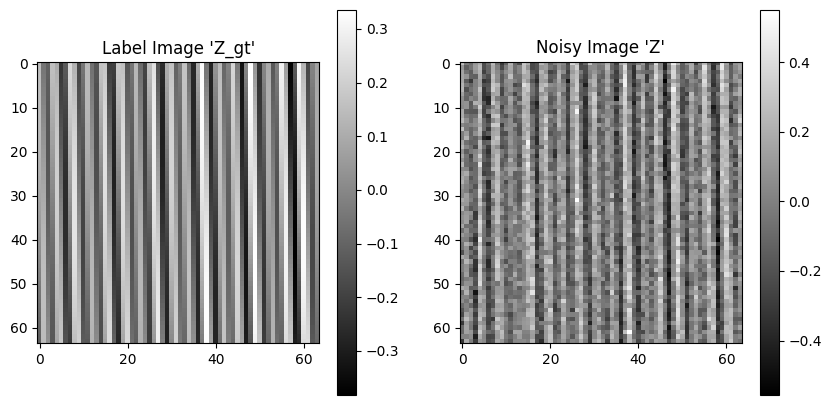

In [38]:
import os
import scipy.io as sio
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carica il file .mat
path = 'Patches_ivs/dt_3/val/'
patch_name = 'patch_02221.mat'

# Label
mat_file_path_l = os.path.join(path + 'label/', patch_name)
mat_data_l = sio.loadmat(mat_file_path_l)

# Noisy
mat_file_path_n = os.path.join(path + 'noisy/', patch_name)
mat_data_n = sio.loadmat(mat_file_path_n)

# Mostra tutte le chiavi nel file .mat (esclude le chiavi nascoste che iniziano con __)
keys_l = [key for key in mat_data_l.keys() if not key.startswith('__')]
keys_n = [key for key in mat_data_n.keys() if not key.startswith('__')]

# Verifica che ci siano variabili utili
if len(keys_l) > 0 and len(keys_n) > 0:
    variable_name_l = keys_l[0]  # Prendi la prima chiave utile per label
    variable_name_n = keys_n[0]  # Prendi la prima chiave utile per noisy
    
    data_l = mat_data_l[variable_name_l]
    data_n = mat_data_n[variable_name_n]
    
    print(f"Displaying variable '{variable_name_l}' with shape {data_l.shape}")
    print(f"Displaying variable '{variable_name_n}' with shape {data_n.shape}")
    
    #commenta in caso
    #data_l = - data_l + data_n

    # Verifica se sono matrici 2D o immagini 2D
    if len(data_l.shape) == 2 and len(data_n.shape) == 2:

        # Mostra le immagini salvate
        plt.figure(figsize=(10, 5))

        # Display original label image
        plt.subplot(1, 2, 1)
        plt.imshow(data_l, cmap='gray')
        plt.title(f"Label Image '{variable_name_l}'")
        plt.colorbar()

        # Display noisy image
        plt.subplot(1, 2, 2)
        plt.imshow(data_n, cmap='gray')
        plt.title(f"Noisy Image '{variable_name_n}'")
        plt.colorbar()

        plt.show()

    else:
        print(f"Variables '{variable_name_l}' or '{variable_name_n}' are not 2D matrices.")
else:
    print("No usable variables found in the .mat file.")